## Getting GDM running in R
Just following [the tutorial](https://mfitzpatrick.al.umces.edu/gdm/)

In [1]:
library(gdm)
library(terra)
library(colorRamps)

terra 1.8.42



In [2]:
sppTab <- southwest[, c("species", "site", "Long", "Lat")]
head(sppTab)

species site Long     Lat      
1 spp1    1066 118.7573 -32.99425
2 spp1    1026 118.3495 -32.04285
3 spp1    1025 117.8260 -31.99067
4 spp1    1026 118.3495 -32.04285
5 spp1    1027 118.8736 -32.09326
6 spp1    1047 118.8157 -32.54354

In [3]:
envTab <- southwest[, c(2:ncol(southwest))]
head(envTab)

site awcA    phTotal  sandA   shcA     solumDepth bio5     bio6     bio15   
1 1066 14.4725 546.1800 71.3250 178.8650 875.1725   31.43824 5.058823 40.38235
2 1026 16.2575 470.9950 68.8975 105.8400 928.4925   33.14412 4.852941 48.20588
3 1025 23.1375 459.7425 71.4700  88.3550 892.2275   32.84000 4.817143 53.88571
4 1026 16.2575 470.9950 68.8975 105.8400 928.4925   33.14412 4.852941 48.20588
5 1027 17.0175 489.3950 74.6775 147.2125 951.9050   33.17813 4.590625 44.00000
6 1047 17.3625 515.0825 75.7525 164.1875 981.4750   32.61579 4.676316 42.00000
  bio18 bio19    Lat       Long    
1  0    132.6471 -32.99425 118.7573
2  0    140.2941 -32.04285 118.3495
3 43    145.0571 -31.99067 117.8260
4  0    140.2941 -32.04285 118.3495
5  0    135.6875 -32.09326 118.8736
6  0    134.0263 -32.54354 118.8157

In [15]:
gdmTab <- formatsitepair(bioData=sppTab, 
                         bioFormat=2, #x-y spp list
                         XColumn="Long", 
                         YColumn="Lat",
                         sppColumn="species", 
                         siteColumn="site", 
                         predData=envTab)
head(gdmTab)

Warning message in formatsitepair(bioData = sppTab, bioFormat = 2, XColumn = "Long", :
“No abundance column was specified, so the biological data are assumed to be presences.”
Aggregation function missing: defaulting to length



distance  weights s1.xCoord s1.yCoord s2.xCoord s2.yCoord s1.awcA
132   0.4485981 1       115.057   -29.40472 115.5677  -29.46599 23.0101
132.1 0.7575758 1       115.057   -29.40472 116.0789  -29.52556 23.0101
132.2 0.8939394 1       115.057   -29.40472 116.5907  -29.58342 23.0101
132.3 0.9178082 1       115.057   -29.40472 117.1029  -29.63957 23.0101
132.4 0.9787234 1       115.057   -29.40472 117.6156  -29.69400 23.0101
132.5 0.3519553 1       115.057   -29.40472 114.9858  -29.85145 23.0101
      s1.phTotal s1.sandA s1.shcA  ⋯ s2.awcA  s2.phTotal s2.sandA s2.shcA 
132   480.3266   83.99326 477.5656 ⋯ 22.39250 494.1225   76.69000 357.7225
132.1 480.3266   83.99326 477.5656 ⋯ 17.09750 415.1275   70.01750 112.4800
132.2 480.3266   83.99326 477.5656 ⋯ 17.03000 333.4400   71.59500 165.7250
132.3 480.3266   83.99326 477.5656 ⋯ 20.27750 411.4175   76.60250 185.1150
132.4 480.3266   83.99326 477.5656 ⋯ 14.27500 277.9775   62.86750 119.9950
132.5 480.3266   83.99326 477.5656 ⋯ 20.72444 482.8578   82.13778 369.2444
      s2.solumDepth s2.bio5  s2.bio6  s2.bio15 s2.bio18 s2.bio19
132   1183.9025     35.50571 7.448572 75.37143  0       228.6572
132.1  985.5300     36.05000 6.605882 64.52941  0       168.8824
132.2  956.5425     36.18750 6.131250 58.75000  0       141.1250
132.3  967.4150     36.04857 5.680000 54.51429  0       128.7429
132.4  705.0200     36.03030 5.409091 50.30303  0       118.0606
132.5  977.1778     33.81000 9.175000 85.45000 30       299.5000

# Load the bioclim rasters clipped to this region

[1] "bio_1"  "bio_10" "bio_11" "bio_12" "bio_13" "bio_14" "bio_15" "bio_16"
 [9] "bio_17" "bio_18" "bio_19" "bio_2"  "bio_3"  "bio_4"  "bio_5"  "bio_6" 
[17] "bio_7"  "bio_8"  "bio_9"

[1] 19

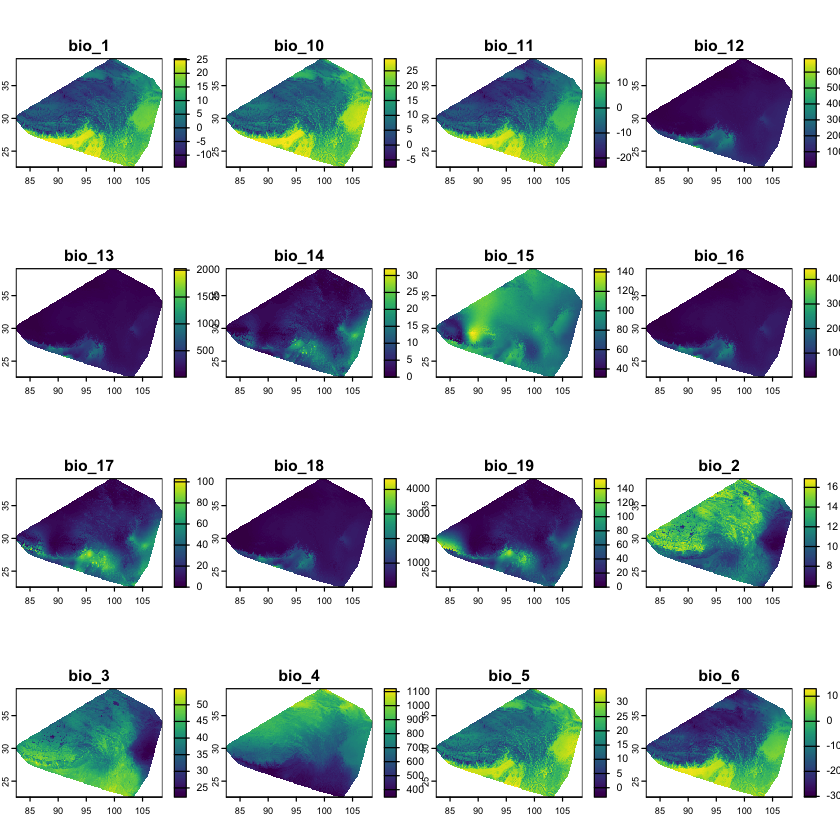

In [4]:
raster_files <- list.files(path = "../env_data/hengduan_wc30s", pattern = "\\.tif$", full.names = TRUE)
#raster_files <- list.files(path = "../env_data/wc10m", pattern = "\\.tif$", full.names = TRUE)

# Load them into a multi-layer SpatRaster
rasters <- rast(raster_files)

hengduan_bioclims <- terra::rast(rasters)

names(rasters)
nlyr(rasters)
plot(rasters)


# Pedicularis data

In [5]:
sppTab <- read.csv("samples.csv")
sppTab <- subset(sppTab, select = -c(Longitude, Latitude))
envTab <-read.csv("sites.csv")
sppTab

X   Name                         elevation bio_18 bio_19 bio_8    
1    0  Pedicularis_siphonantha      2742       222   127     6.788166
2    1  Pedicularis_siphonantha      4280       356    18     9.299000
3    2  Pedicularis_siphonantha      3785       212    22     7.581500
4    3  Pedicularis_siphonantha      3415       282    25     8.188875
5    4  Pedicularis_siphonantha      3525       245    12     8.783625
6    5  Pedicularis_siphonantha      2098      1102    58    16.107750
7    6  Pedicularis_siphonantha      3472       365    38    10.646000
8    7  Pedicularis_siphonantha      2349       646    86    11.377708
9    8  Pedicularis_siphonantha      4386       267     9     9.001041
10   9  Pedicularis_milliana         4357       330    34     9.324667
11  10  Pedicularis_milliana         4307       330    34     9.324667
12  11  Pedicularis_milliana         4017       347    39    10.962708
13  12  Pedicularis_milliana         4162       330    34     9.324667
14  13  Pedicularis_milliana         3880       347    39    10.962708
15  14  Pedicularis_milliana         3945       339    48    10.512292
16  15  Pedicularis_milliana         3829       339    48    10.512292
17  16  Pedicularis_milliana         3267       333    42    11.105333
18  17  Pedicularis_milliana         3314       333    42    11.105333
19  18  Pedicularis_milliana         3394       340    45    12.156500
20  19  Pedicularis_milliana         3391       354    39    10.653042
21  20  Pedicularis_milliana         3560       354    39    10.653042
22  21  Pedicularis_milliana         3471       358    36     9.839000
23  22  Pedicularis_milliana         3377       340    45    12.156500
24  23  Pedicularis_milliana         3250       340    45    12.156500
25  24  Pedicularis_milliana         3287       347    50    12.057000
26  25  Pedicularis_milliana         3263       363    46    10.451333
27  26  Pedicularis_milliana         3160       359    51    12.910292
28  27  Pedicularis_milliana         3695       363    46    10.451333
29  28  Pedicularis_milliana         3791       363    46    10.451333
30  29  Pedicularis_milliana         3362       341    41    11.936916
⋮   ⋮   ⋮                            ⋮         ⋮      ⋮      ⋮        
715 714 Pedicularis_tsiangii         2336      517    31     17.875626
716 715 Pedicularis_petitmenginii    3349      429    14      8.562292
717 716 Pedicularis_petitmenginii    3415      429    14      8.562292
718 717 Pedicularis_petitmenginii    1645      439    19     14.283042
719 718 Pedicularis_petitmenginii    3565      370    21     12.067708
720 719 Pedicularis_petitmenginii    3475      374    13      9.934916
721 720 Pedicularis_petitmenginii    2674      364    20      8.732250
722 721 Pedicularis_petitmenginii    3226      395    17      7.343542
723 722 Pedicularis_petitmenginii    3697      402    23      5.884208
724 723 Pedicularis_petitmenginii    2991      382    12      9.324083
725 724 Pedicularis_petitmenginii    3273      417    12     10.836041
726 725 Pedicularis_franchetiana     4113      429    14      8.562292
727 726 Pedicularis_franchetiana     3737      440    21      5.370333
728 727 Pedicularis_aschistorrhyncha 3926      348    16      8.636209
729 728 Pedicularis_corymbifera      4570      282    12      6.400458
730 729 Pedicularis_corymbifera      2698      415    23     12.597709
731 730 Pedicularis_corymbifera      2225      384    20     12.159458
732 731 Pedicularis_wilsonii         4067      440    21      5.370333
733 732 Pedicularis_paxiana          4492      402    15      6.591375
734 733 Pedicularis_fastigiata       3612      369    63     10.952666
735 734 Pedicularis_gagnepainiana    2114      611    46     18.755041
736 735 Pedicularis_stadlmanniana    3258      413    62     16.807625
737 736 Pedicularis_kariensis        2894      365    69     14.648041
738 737 Pedicularis_limprichtiana    3350      389    60     15.628000
739 738 Pedicularis_souliei 

In [50]:
gdmTab <- formatsitepair(bioData=sppTab, 
                         bioFormat=2, #x-y spp list
                         XColumn="Longitude", 
                         YColumn="Latitude",
                         sppColumn="Name", 
                         siteColumn="cluster", 
                         predData=envTab)
head(gdmTab)

Warning message in formatsitepair(bioData = sppTab, bioFormat = 2, XColumn = "Longitude", :
“No abundance column was specified, so the biological data are assumed to be presences.”
Aggregation function missing: defaulting to length



distance  weights s1.xCoord s1.yCoord s2.xCoord s2.yCoord s1.bio_18
1   1.0000000 1       85.42553  28.50715  104.41133 27.10423  65       
1.1 1.0000000 1       85.42553  28.50715  100.04644 25.91494  65       
1.2 0.2500000 1       85.42553  28.50715   91.62617 29.03838  65       
1.3 0.6923077 1       85.42553  28.50715   96.82674 31.34965  65       
1.4 0.8181818 1       85.42553  28.50715  100.02082 30.10125  65       
1.5 0.5714286 1       85.42553  28.50715   94.57198 29.64066  65       
    s1.bio_19 s1.bio_8  s1.bio_9   ⋯ s2.bio_7 s2.bio_6  s2.bio_11 s2.bio_10
1   128       -9.771334 -0.3426251 ⋯ 25.18950  -2.38550  3.395000 18.068542
1.1 128       -9.771334 -0.3426251 ⋯ 22.74075  -0.37375  7.017000 18.046959
1.2 128       -9.771334 -0.3426251 ⋯ 31.62400 -16.65550 -6.322792  8.907833
1.3 128       -9.771334 -0.3426251 ⋯ 31.58675 -16.32450 -7.782291  9.089708
1.4 128       -9.771334 -0.3426251 ⋯ 31.68850 -17.50225 -6.914834  8.339417
1.5 128       -9.771334 -0.3426251 ⋯ 27.89400 -12.86425 -5.288333  9.795667
    s2.bio_12 s2.bio_13 s2.bio_17 s2.bio_16 s2.bio_14 s2.bio_15
1   956       185       37        502       12         82.42439
1.1 851       143       58        396       13         64.11788
1.2 321        85        7        219        2        111.94000
1.3 581       129       16        343        4         95.45327
1.4 617       147        8        384        1        103.47400
1.5 633       130       16        350        4         88.55617

In [5]:
gdm.1 <- gdm(data=gdmTab, geo=TRUE)
summary(gdm.1)

[1] 
[1] 
[1] GDM Modelling Summary
[1] Creation Date:  Fri May 23 13:12:34 2025
[1] 
[1] Name:  gdm.1
[1] 
[1] Data:  gdmTab
[1] 
[1] Samples:  666
[1] 
[1] Geographical distance used in model fitting?  TRUE
[1] 
[1] NULL Deviance:  180.945
[1] GDM Deviance:  80.616
[1] Percent Deviance Explained:  55.447
[1] 
[1] Intercept:  0.016
[1] 
[1] PREDICTOR ORDER BY SUM OF I-SPLINE COEFFICIENTS:
[1] 
[1] Predictor 1: Geographic
[1] Splines: 3
[1] Min Knot: 0.489
[1] 50% Knot: 5.891
[1] Max Knot: 22.396
[1] Coefficient[1]: 0.596
[1] Coefficient[2]: 0.454
[1] Coefficient[3]: 0.632
[1] Sum of coefficients for Geographic: 1.682
[1] 
[1] Predictor 2: bio_7
[1] Splines: 3
[1] Min Knot: 22.617
[1] 50% Knot: 29.803
[1] Max Knot: 38.259
[1] Coefficient[1]: 0.614
[1] Coefficient[2]: 0.752
[1] Coefficient[3]: 0
[1] Sum of coefficients for bio_7: 1.366
[1] 
[1] Predictor 3: bio_3
[1] Splines: 3
[1] Min Knot: 28.726
[1] 50% Knot: 41.767
[1] Max Knot: 48.976
[1] Coefficient[1]: 0.518
[1] Coefficient[2]: 0

In [6]:
length(gdm.1$predictors)

[1] 20

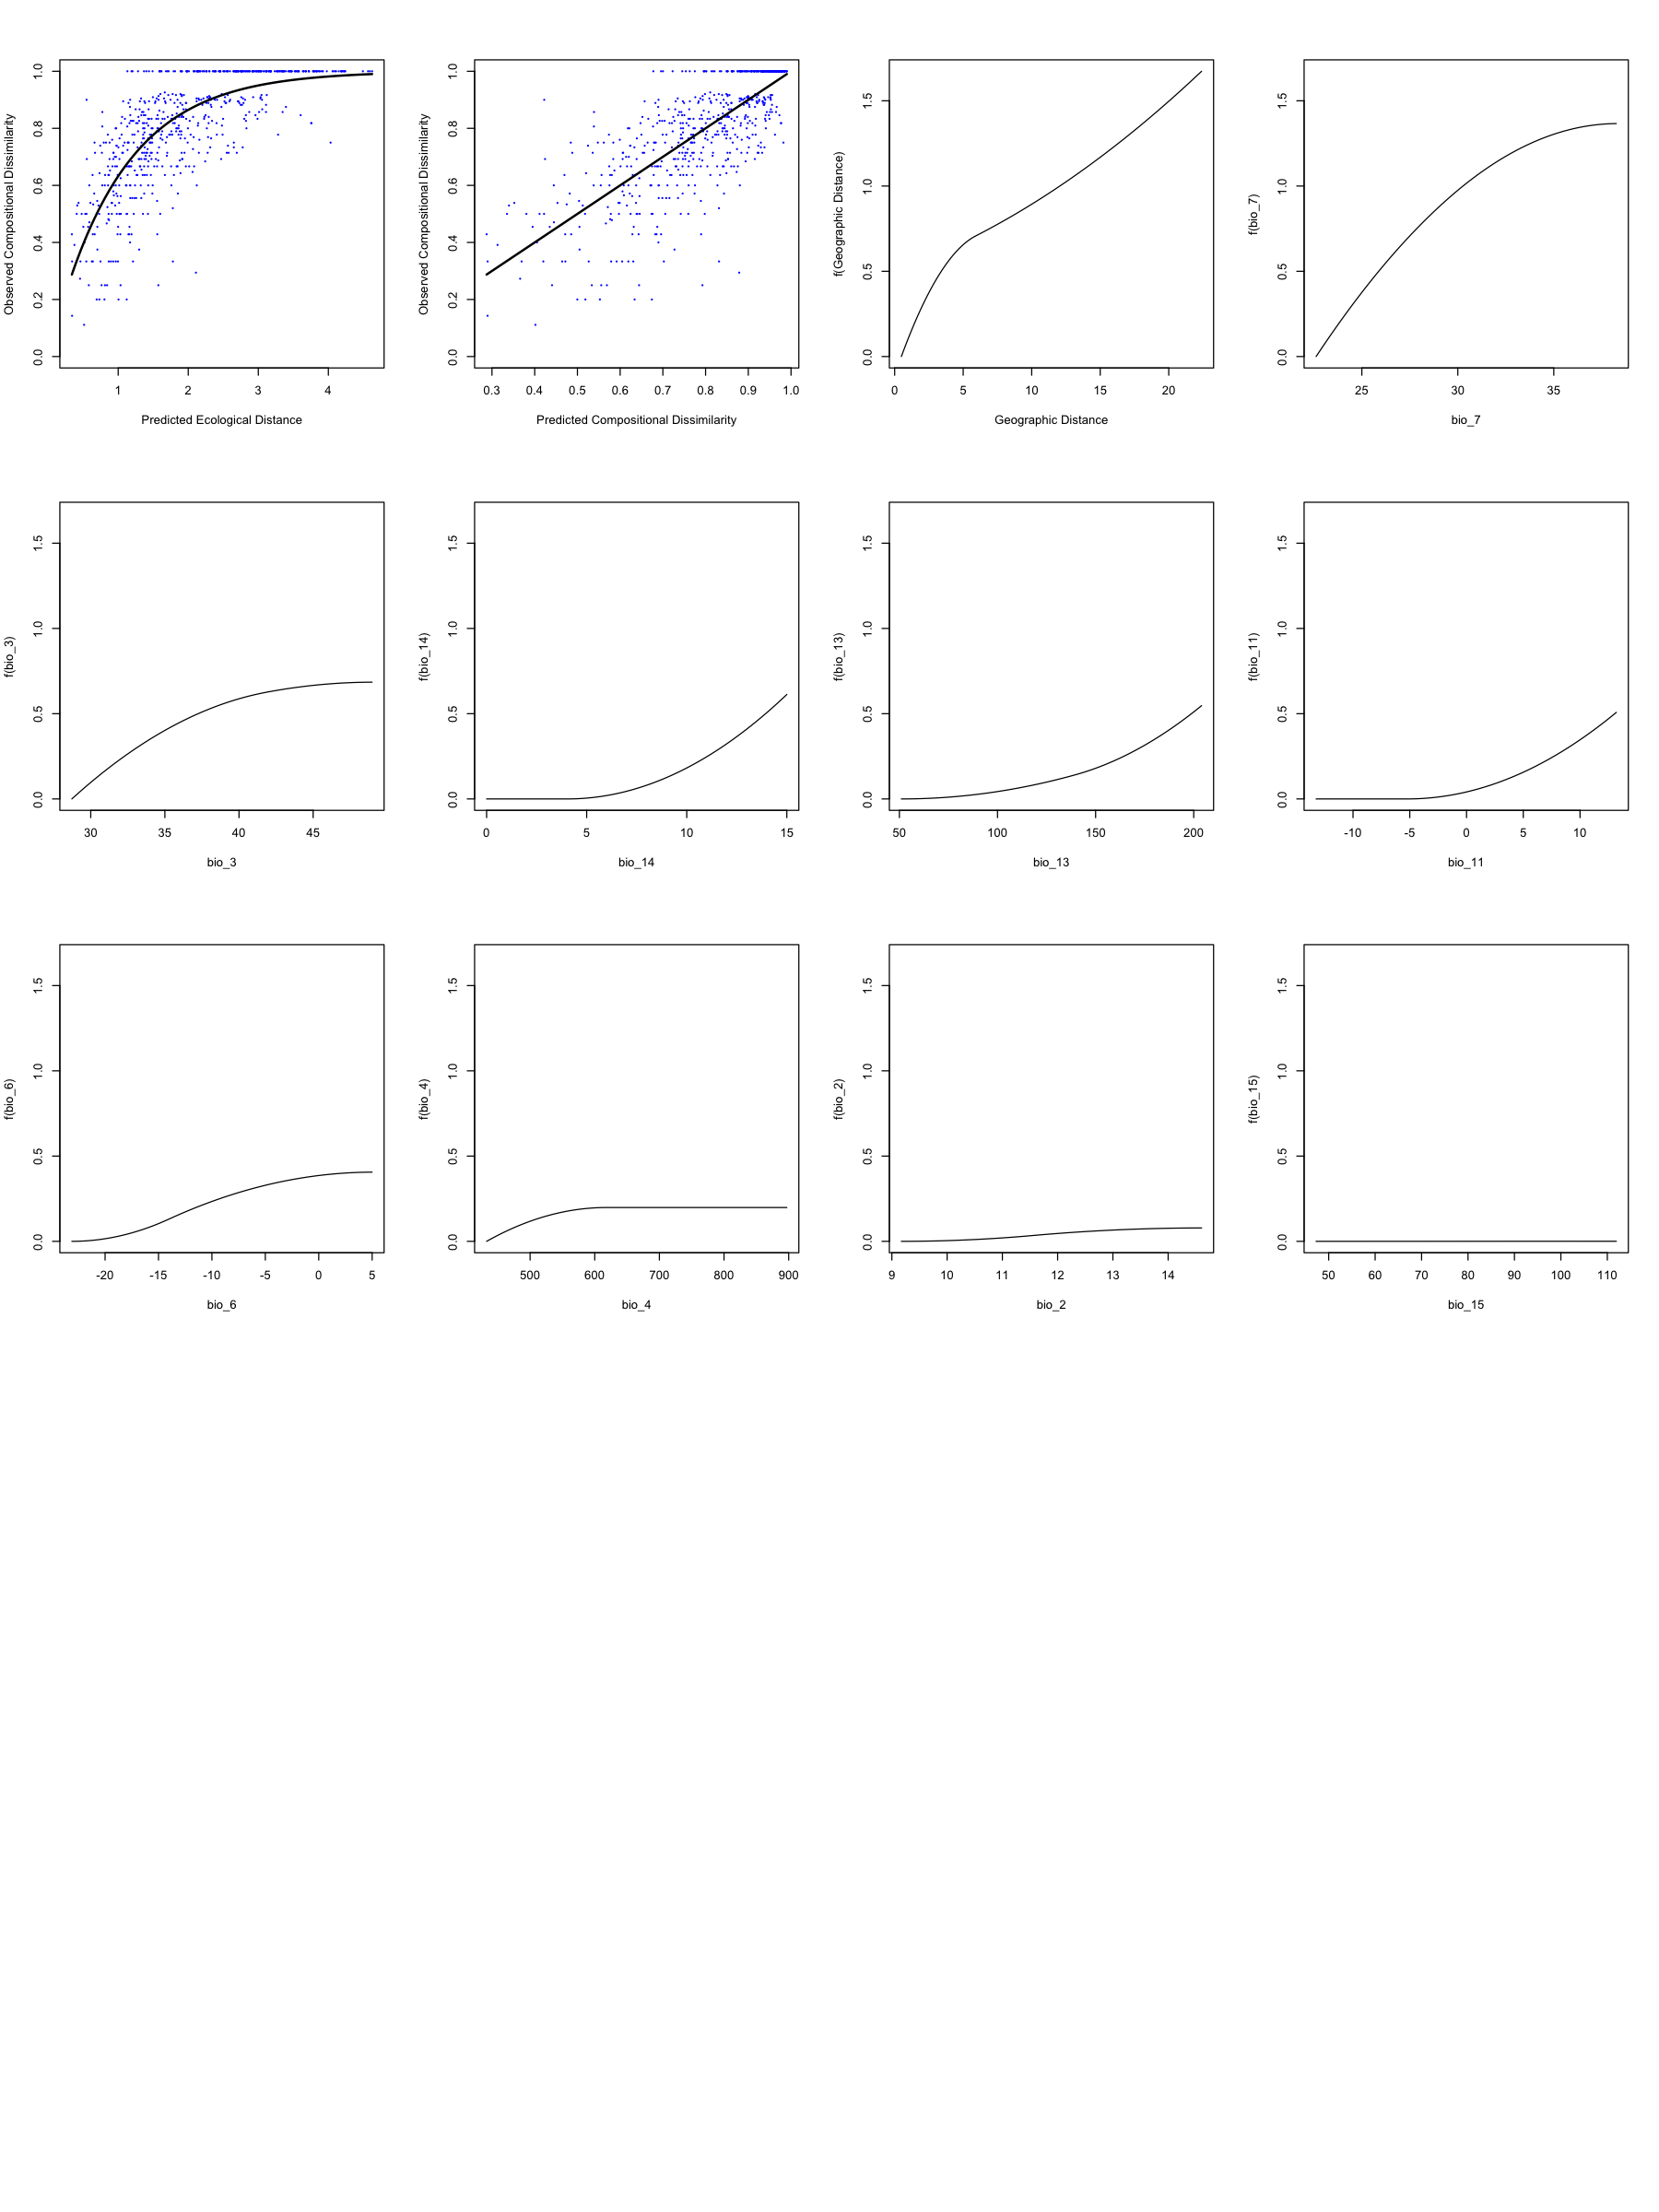

In [6]:
options(repr.plot.width = 15, repr.plot.height = 20)
plot(gdm.1, plot.layout=c(5,4))

In [ ]:
transRasts <- gdm.transform(model=gdm.1, data=hengduan_bioclims)
terra::plot(transRasts, col=rgb.tables(1000))

In [8]:
??gdm::gdm.transform

R Information

Help files with alias or concept or title matching ‘gdm.transform’
using regular expression matching:


gdm::gdm.transform      Transform Environmental Data Using a Fitted
                        Generalized Dissimilarity Model
  Aliases: gdm.transform


Type '?PKG::FOO' to inspect entries 'PKG::FOO', or 'TYPE?PKG::FOO' for
entries like 'PKG::FOO-TYPE'.




## Use site x species matrix and bioclim rasters

In [6]:
matrixTab <- read.csv("site_species_matrix.csv")
head(matrixTab)

cluster Pedicularis_aff._amplituba Pedicularis_aff._sigmoidea
1 0       0                          0                         
2 1       0                          0                         
3 2       0                          0                         
4 3       0                          0                         
5 4       0                          0                         
6 5       0                          0                         
  Pedicularis_amplituba Pedicularis_armata Pedicularis_aschistorrhyncha
1 0                     0                  0                           
2 0                     0                  0                           
3 0                     0                  0                           
4 0                     0                  0                           
5 0                     1                  1                           
6 0                     0                  0                           
  Pedicularis_axillaris Pedicularis_cephalantha Pedicularis_chinensis
1 0                     0                       0                    
2 0                     0                       0                    
3 1                     1                       0                    
4 0                     0                       0                    
5 1                     0                       0                    
6 1                     0                       0                    
  Pedicularis_corymbifera ⋯ Pedicularis_tsiangii Pedicularis_variegata
1 0                       ⋯ 0                    0                    
2 0                       ⋯ 1                    0                    
3 0                       ⋯ 0                    0                    
4 0                       ⋯ 0                    0                    
5 0                       ⋯ 0                    0                    
6 0                       ⋯ 0                    0                    
  Pedicularis_veronicifolia Pedicularis_wanghongiae Pedicularis_wilsonii
1 0                         0                       0                   
2 0                         0                       0                   
3 1                         0                       0                   
4 0                         0                       0                   
5 0                         0                       0                   
6 0                         0                       0                   
  Pedicularis_yanyuanensis Pedicularis_yunnanensis Pedicularisobliquigaleata
1 0                        0                       0                        
2 0                        0                       0                        
3 0                        1                       0                        
4 0                        0                       0                        
5 0                        0                       0                        
6 0                        0                       0                        
  Latitude Longitude
1 28.50715  85.42553
2 27.10423 104.41133
3 25.91494 100.04644
4 29.03838  91.62617
5 31.34965  96.82674
6 30.10125 100.02082

In [43]:
hengduan_bioclims <- terra::rast(rasters)
gdmTab.rast <- formatsitepair(bioData=matrixTab, 
                              bioFormat=1, # site/species matrix
                              XColumn="Longitude", 
                              YColumn="Latitude", 
                              siteColumn="cluster",
                              predData=rasters) #raster stack

Warning message in formatsitepair(bioData = matrixTab, bioFormat = 1, XColumn = "Longitude", :
“When using rasters for environmental covariates (predictors), each site is assigned to the
              raster cell in which the site is located. If more than one site occurs within the same raster cell,
              the biological data of those sites are aggregated (more likely as raster resolution decreases).”


In [63]:
hengduan_bioclims

class       : SpatRaster 
dimensions  : 100, 158, 19  (nrow, ncol, nlyr)
resolution  : 0.1666667, 0.1666667  (x, y)
extent      : 82.33333, 108.6667, 22.5, 39.16667  (xmin, xmax, ymin, ymax)
coord. ref. : lon/lat WGS 84 (EPSG:4326) 

In [44]:
gdmTab.rast

distance  weights s1.xCoord s1.yCoord s2.xCoord s2.yCoord s1.bio_1 
1    0.1428571 1       100.0792  37.5125   101.74583 36.97917  -1.158333
1.1  0.5000000 1       100.0792  37.5125   103.27083 35.30417  -1.158333
1.2  0.6000000 1       100.0792  37.5125   106.94583 34.69583  -1.158333
1.3  1.0000000 1       100.0792  37.5125   103.47083 34.05417  -1.158333
1.4  0.7142857 1       100.0792  37.5125   100.71250 33.58750  -1.158333
1.5  0.5000000 1       100.0792  37.5125   102.37083 33.09583  -1.158333
1.6  0.3333333 1       100.0792  37.5125    97.42083 32.96250  -1.158333
1.7  0.7500000 1       100.0792  37.5125   103.58750 32.62083  -1.158333
1.8  0.6000000 1       100.0792  37.5125   102.60417 31.72083  -1.158333
1.9  0.5555556 1       100.0792  37.5125   100.80417 31.68750  -1.158333
1.10 0.6363636 1       100.0792  37.5125    98.60417 31.59583  -1.158333
1.11 0.2000000 1       100.0792  37.5125    93.11250 31.57917  -1.158333
1.12 0.6666667 1       100.0792  37.5125    96.82917 31.34583  -1.158333
1.13 0.8181818 1       100.0792  37.5125   102.65417 30.91250  -1.158333
1.14 0.6000000 1       100.0792  37.5125   100.02083 30.10417  -1.158333
1.15 0.7777778 1       100.0792  37.5125   101.79583 29.88750  -1.158333
1.16 0.6923077 1       100.0792  37.5125    94.57083 29.63750  -1.158333
1.17 0.8461538 1       100.0792  37.5125   102.51250 29.54583  -1.158333
1.18 0.8181818 1       100.0792  37.5125    97.48750 29.26250  -1.158333
1.19 0.6363636 1       100.0792  37.5125    93.17917 29.04583  -1.158333
1.20 0.4285714 1       100.0792  37.5125    91.62917 29.03750  -1.158333
1.21 0.7777778 1       100.0792  37.5125   100.17083 28.60417  -1.158333
1.22 0.7142857 1       100.0792  37.5125    85.42917 28.50417  -1.158333
1.23 0.8750000 1       100.0792  37.5125    98.92083 28.34583  -1.158333
1.24 1.0000000 1       100.0792  37.5125   102.57917 28.08750  -1.158333
1.25 0.7142857 1       100.0792  37.5125    87.85417 28.05417  -1.158333
1.26 1.0000000 1       100.0792  37.5125    98.79583 27.87083  -1.158333
1.27 0.9000000 1       100.0792  37.5125   101.07083 27.78750  -1.158333
1.28 0.8888889 1       100.0792  37.5125    99.77083 27.76250  -1.158333
1.29 0.9000000 1       100.0792  37.5125   100.22917 27.12917  -1.158333
⋮    ⋮         ⋮       ⋮         ⋮         ⋮         ⋮         ⋮        
29.6 0.8333333 1       101.07083 27.78750  102.79583 25.02917   6.154167
29.7 0.9047619 1       101.07083 27.78750  100.90417 24.47917   6.154167
30   0.2500000 1        99.77083 27.76250  100.22917 27.12917   5.566667
30.1 0.8000000 1        99.77083 27.76250  104.41250 27.10417   5.566667
30.2 0.6666667 1        99.77083 27.76250   99.12917 26.48750   5.566667
30.3 0.8400000 1        99.77083 27.76250  102.97917 26.34583   5.566667
30.4 0.6666667 1        99.77083 27.76250  100.04583 25.91250   5.566667
30.5 0.8181818 1        99.77083 27.76250  102.79583 25.02917   5.566667
30.6 0.8947368 1        99.77083 27.76250  100.90417 24.47917   5.566667
31   0.7272727 1       100.22917 27.12917  104.41250 27.10417   8.587500
31.1 0.6923077 1       100.22917 27.12917   99.12917 26.48750   8.587500
31.2 0.7037037 1       100.22917 27.12917  102.97917 26.34583   8.587500
31.3 0.5625000 1       100.22917 27.12917  100.04583 25.91250   8.587500
31.4 0.6666667 1       100.22917 27.12917  102.79583 25.02917   8.587500
31.5 0.8095238 1       100.22917 27.12917  100.90417 24.47917   8.587500
32   0.5714286 1       104.41250 27.10417   99.12917 26.48750  10.337501
32.1 0.8666667 1       104.41250 27.10417  102.97917 26.34583  10.337501
32.2 0.8000000 1       104.41250 27.10417  100.04583 25.91250  10.337501
32.3 0.6666667 1       104.41250 27.10417  102.79583 25.02917  10.337501
32.4 0.7777778 1       104.41250 27.10417  100.90417 24.47917  10.337501
33   0.8947368 1        99.12917 26.48750  102.97917 26.34583  15.825000
33.1 0.7500000 1        99.12917 26.48750  100.04583 25.91250  15.825000
33.2 0.7500000 1        99.12917 26.48750  102.79583 25.02917  

In [45]:
gdmRastMod <- gdm(data=gdmTab.rast, geo=TRUE)
summary(gdmRastMod)

[1] 
[1] 
[1] GDM Modelling Summary
[1] Creation Date:  Fri May 23 15:25:40 2025
[1] 
[1] Name:  gdmRastMod
[1] 
[1] Data:  gdmTab.rast
[1] 
[1] Samples:  666
[1] 
[1] Geographical distance used in model fitting?  TRUE
[1] 
[1] NULL Deviance:  180.945
[1] GDM Deviance:  84.673
[1] Percent Deviance Explained:  53.205
[1] 
[1] Intercept:  0
[1] 
[1] PREDICTOR ORDER BY SUM OF I-SPLINE COEFFICIENTS:
[1] 
[1] Predictor 1: Geographic
[1] Splines: 3
[1] Min Knot: 0.491
[1] 50% Knot: 5.893
[1] Max Knot: 22.39
[1] Coefficient[1]: 0.623
[1] Coefficient[2]: 0.484
[1] Coefficient[3]: 0.425
[1] Sum of coefficients for Geographic: 1.531
[1] 
[1] Predictor 2: bio_7
[1] Splines: 3
[1] Min Knot: 22.4
[1] 50% Knot: 29.5
[1] Max Knot: 38.2
[1] Coefficient[1]: 0.55
[1] Coefficient[2]: 0.907
[1] Coefficient[3]: 0
[1] Sum of coefficients for bio_7: 1.456
[1] 
[1] Predictor 3: bio_14
[1] Splines: 3
[1] Min Knot: 0
[1] 50% Knot: 4
[1] Max Knot: 16
[1] Coefficient[1]: 0
[1] Coefficient[2]: 0
[1] Coefficient[3]

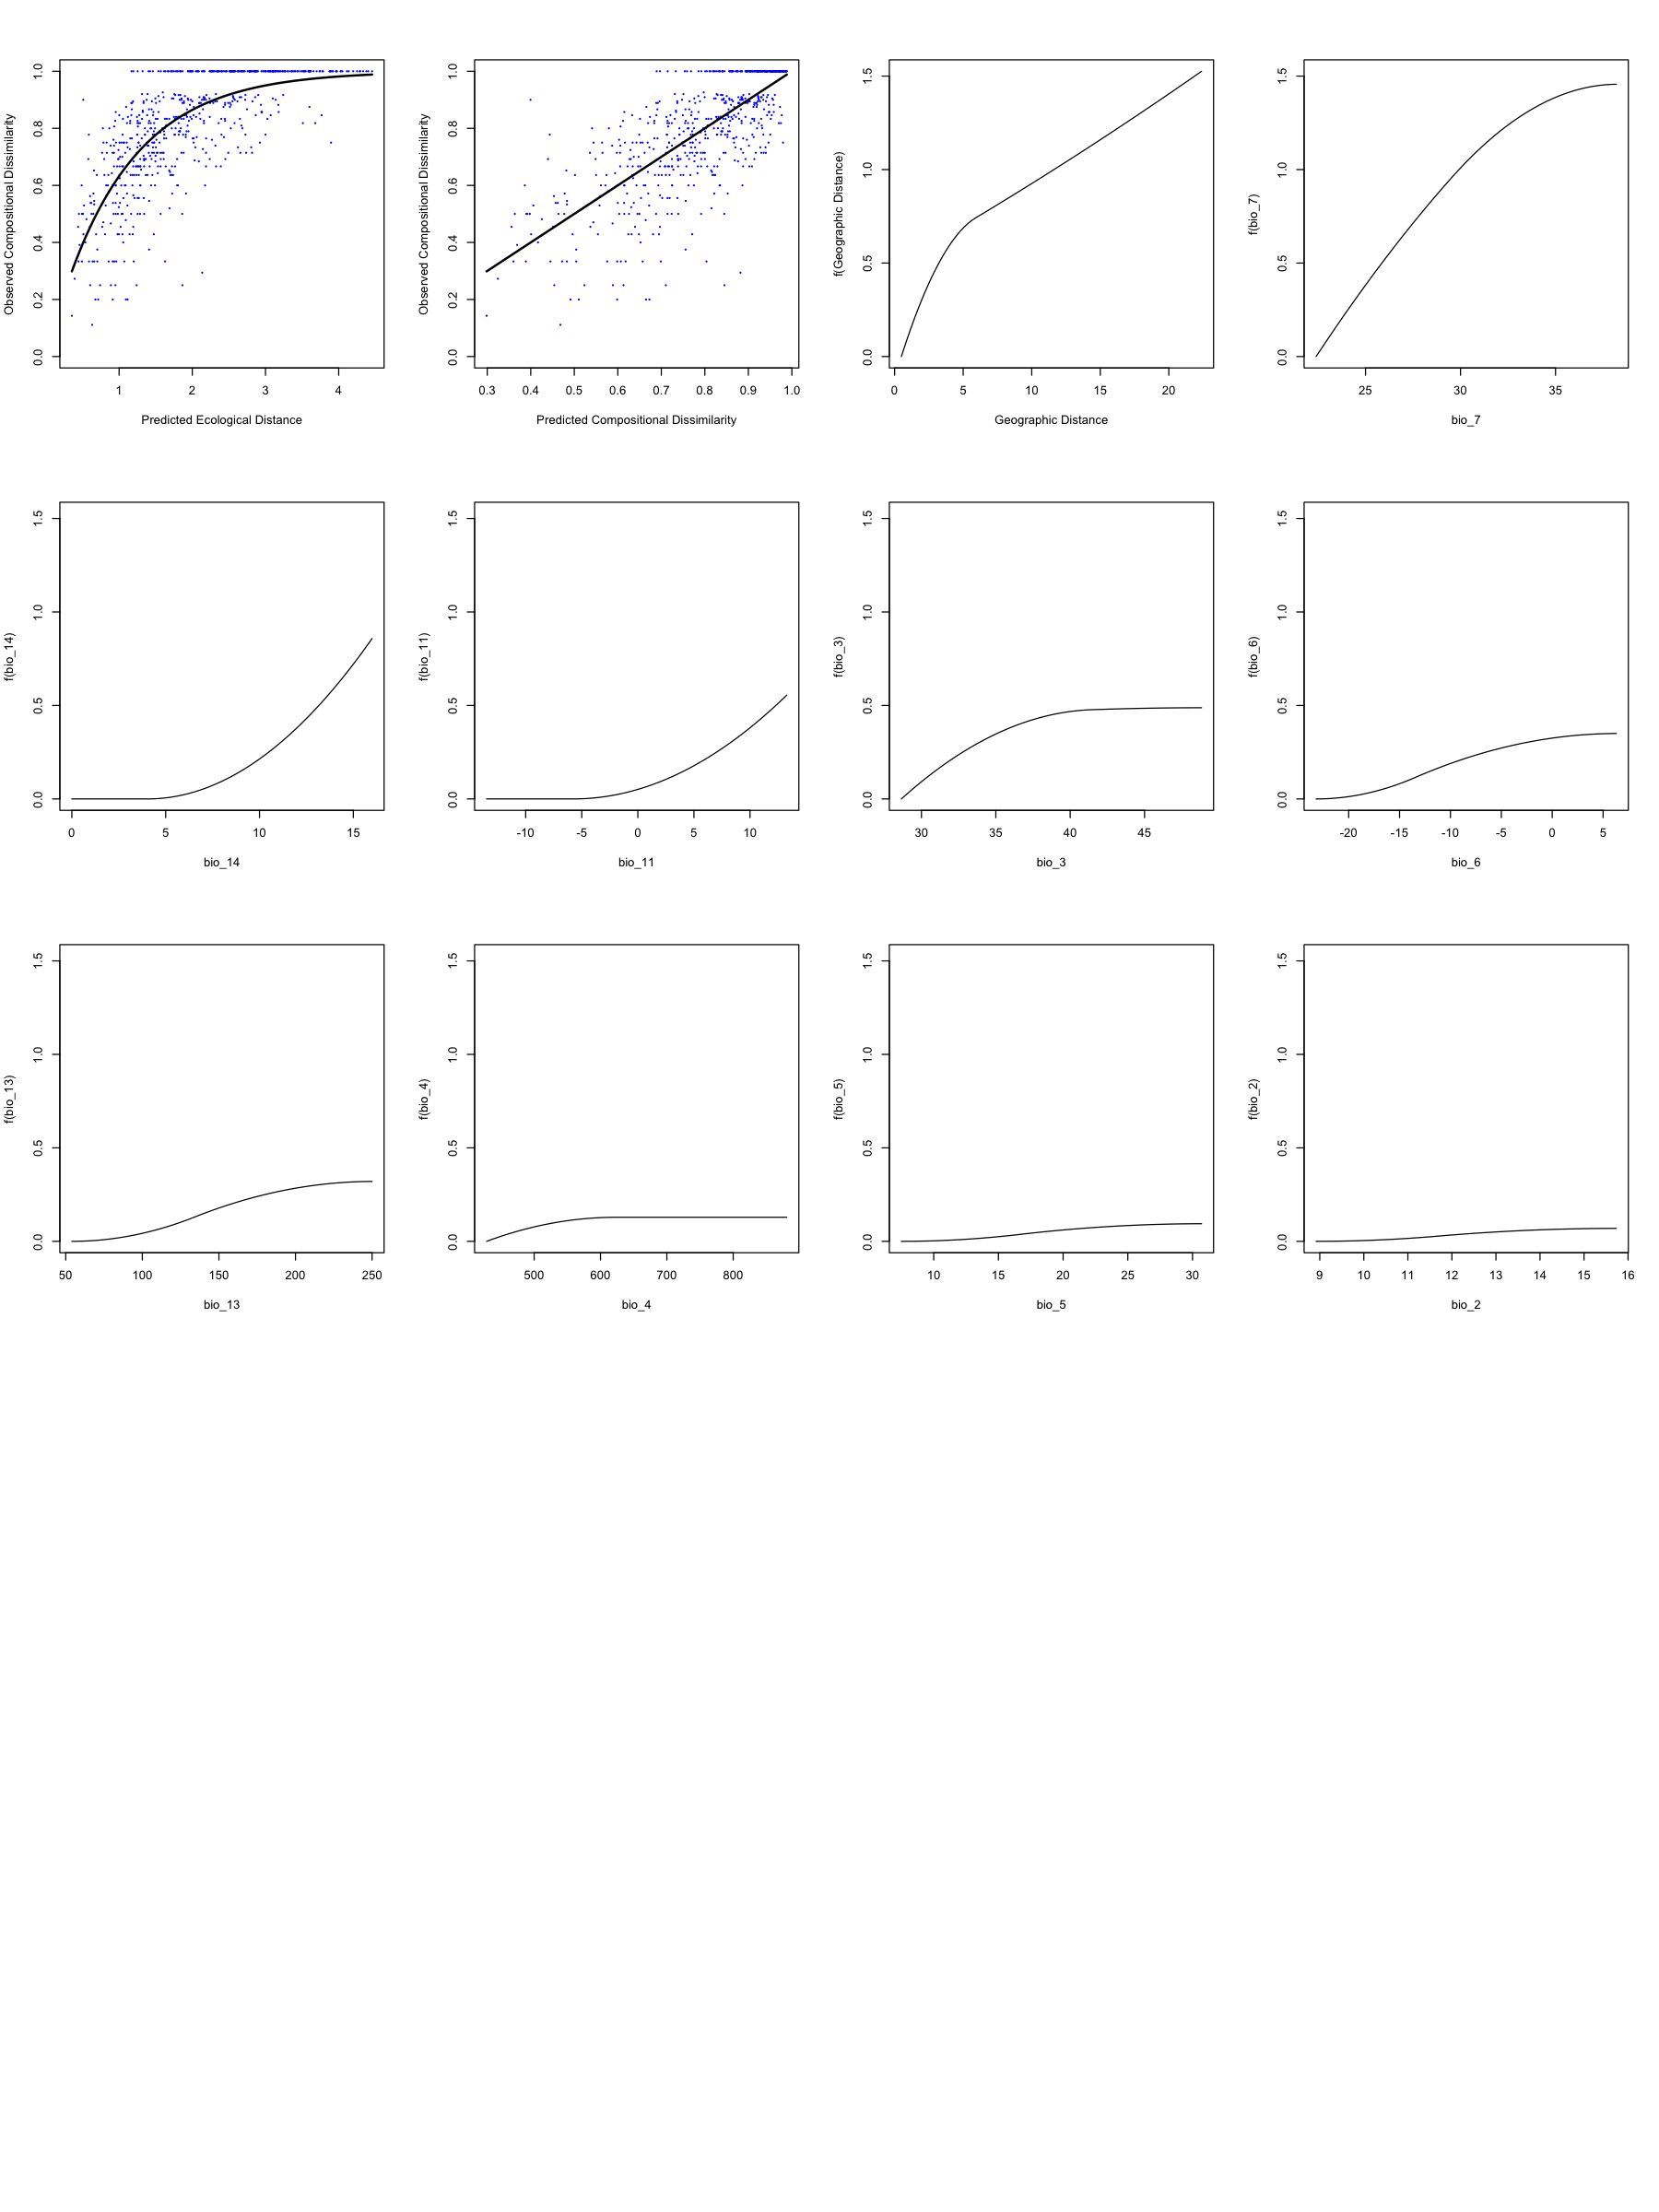

In [46]:
options(repr.plot.width = 15, repr.plot.height = 20)
plot(gdmRastMod, plot.layout=c(5,4))

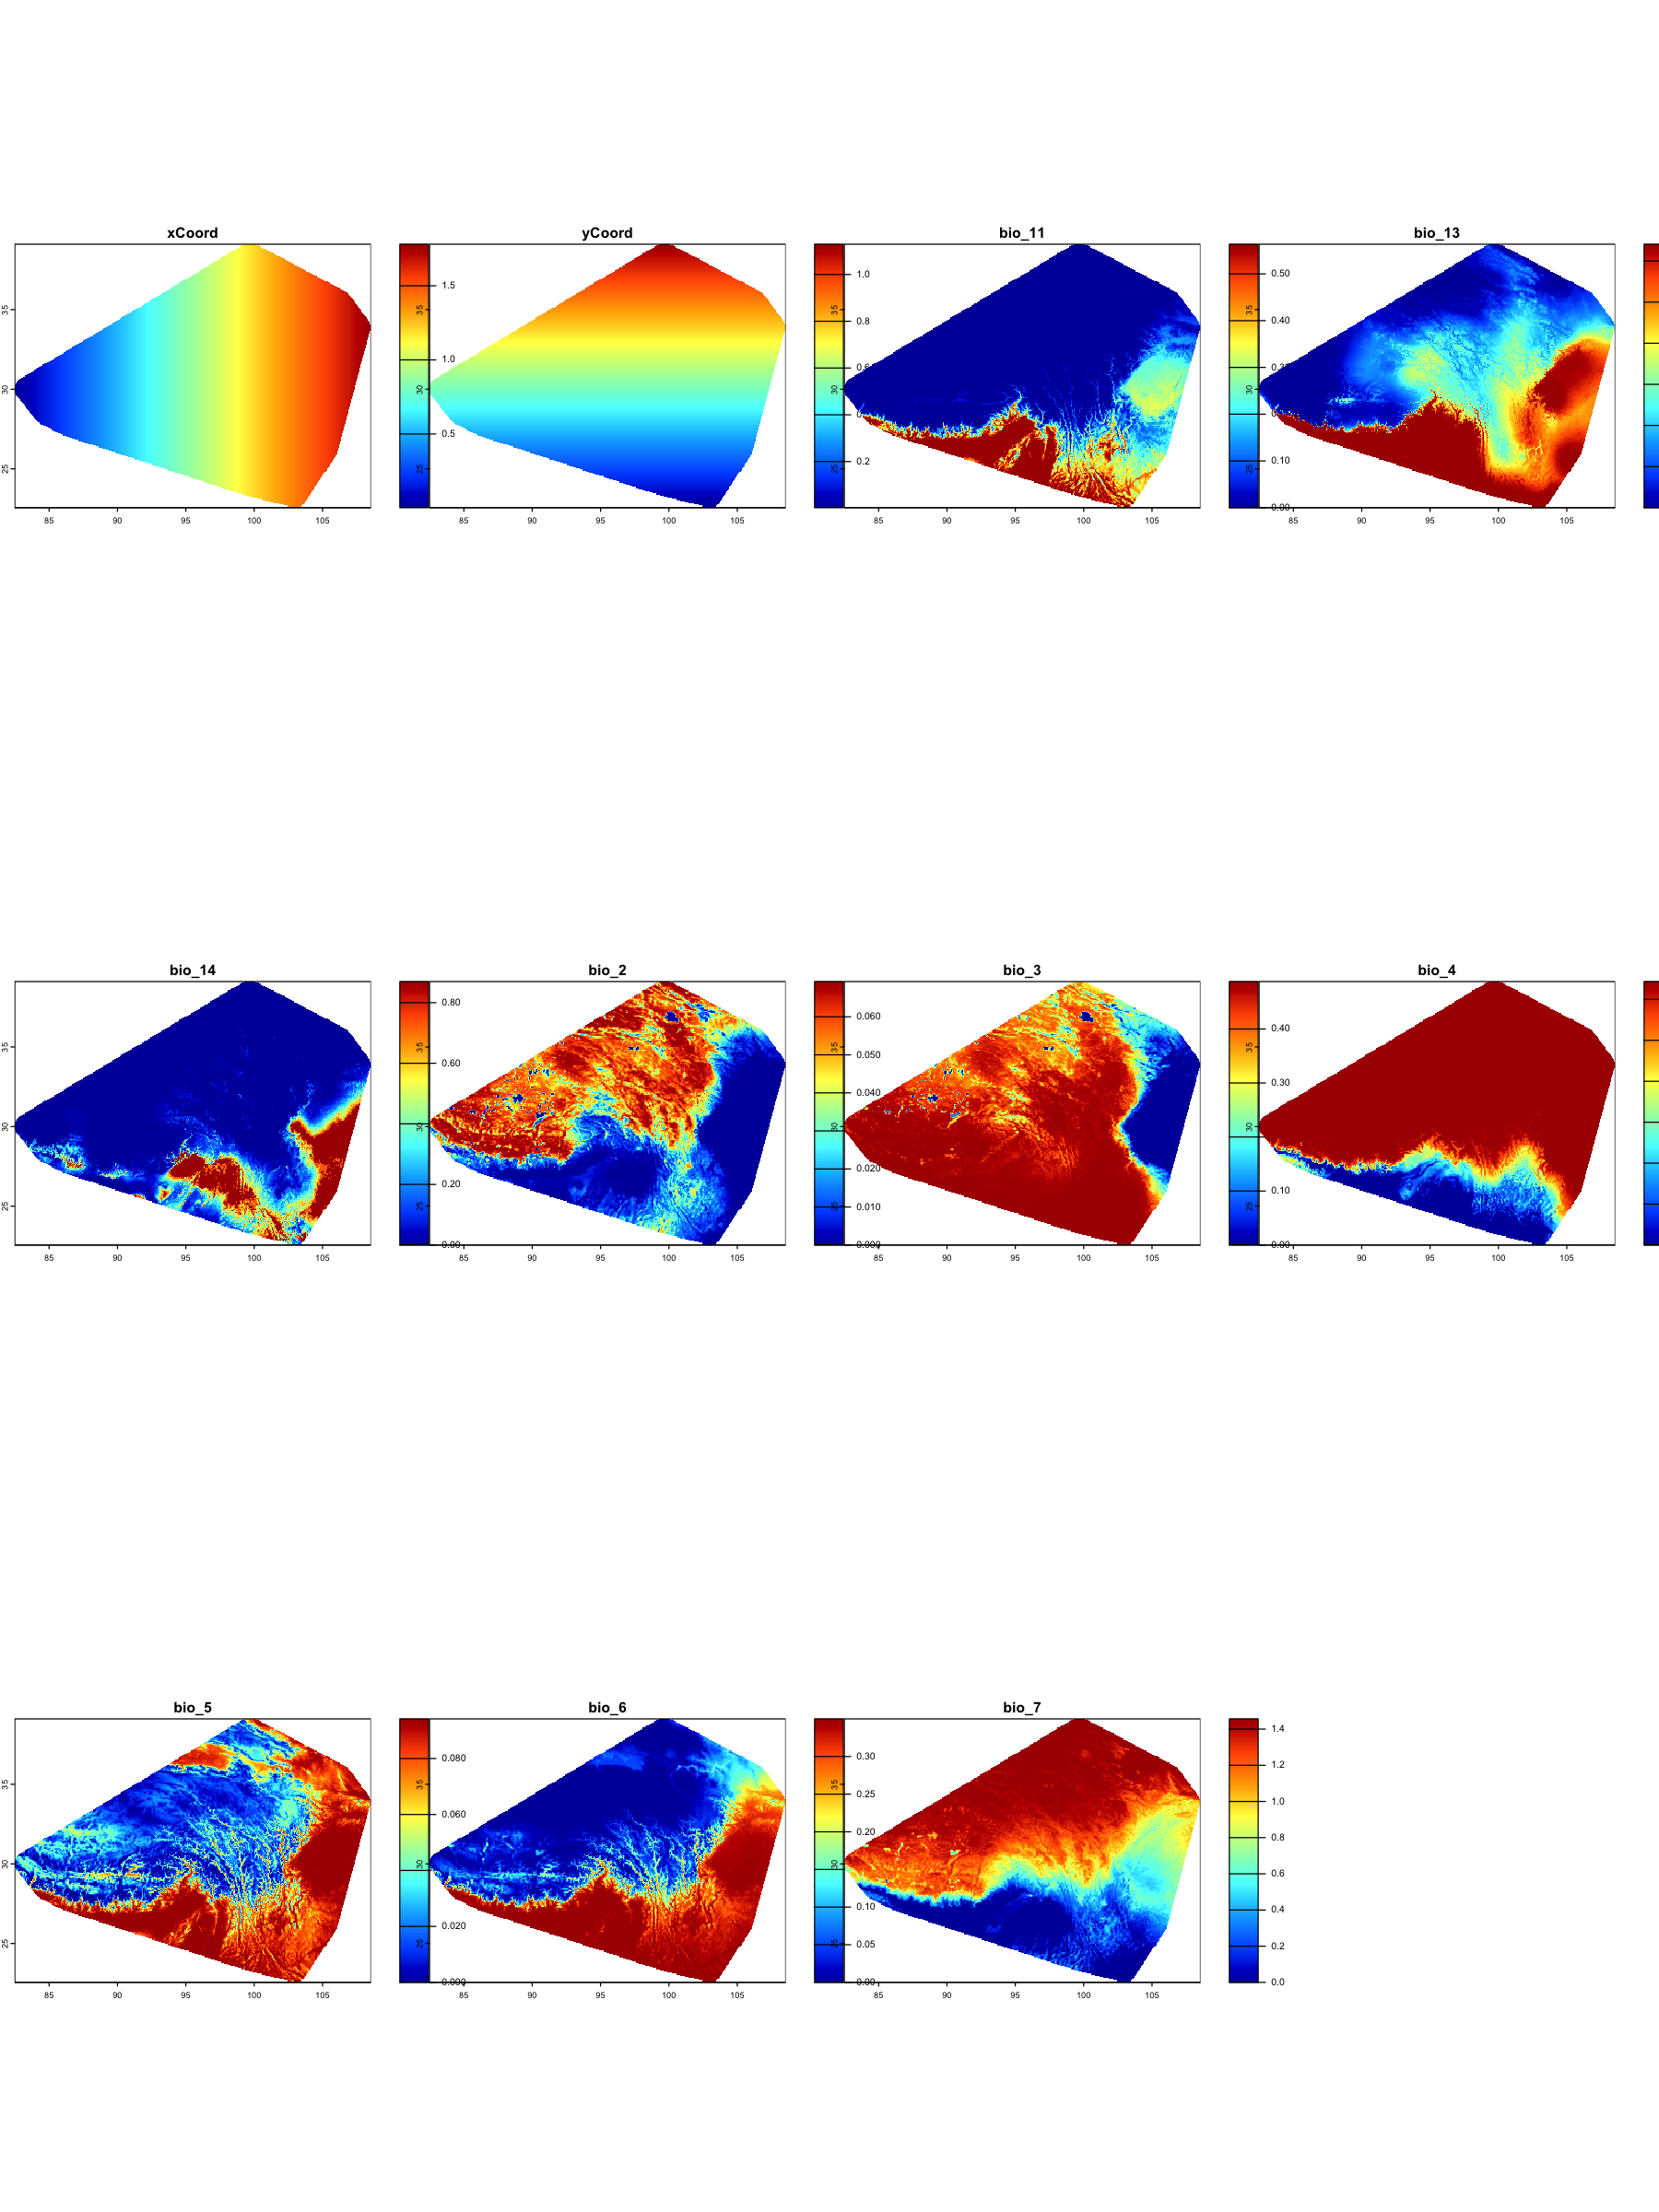

In [47]:
transRasts <- gdm.transform(model=gdmRastMod, data=rasters)
terra::plot(transRasts, col=rgb.tables(1000))

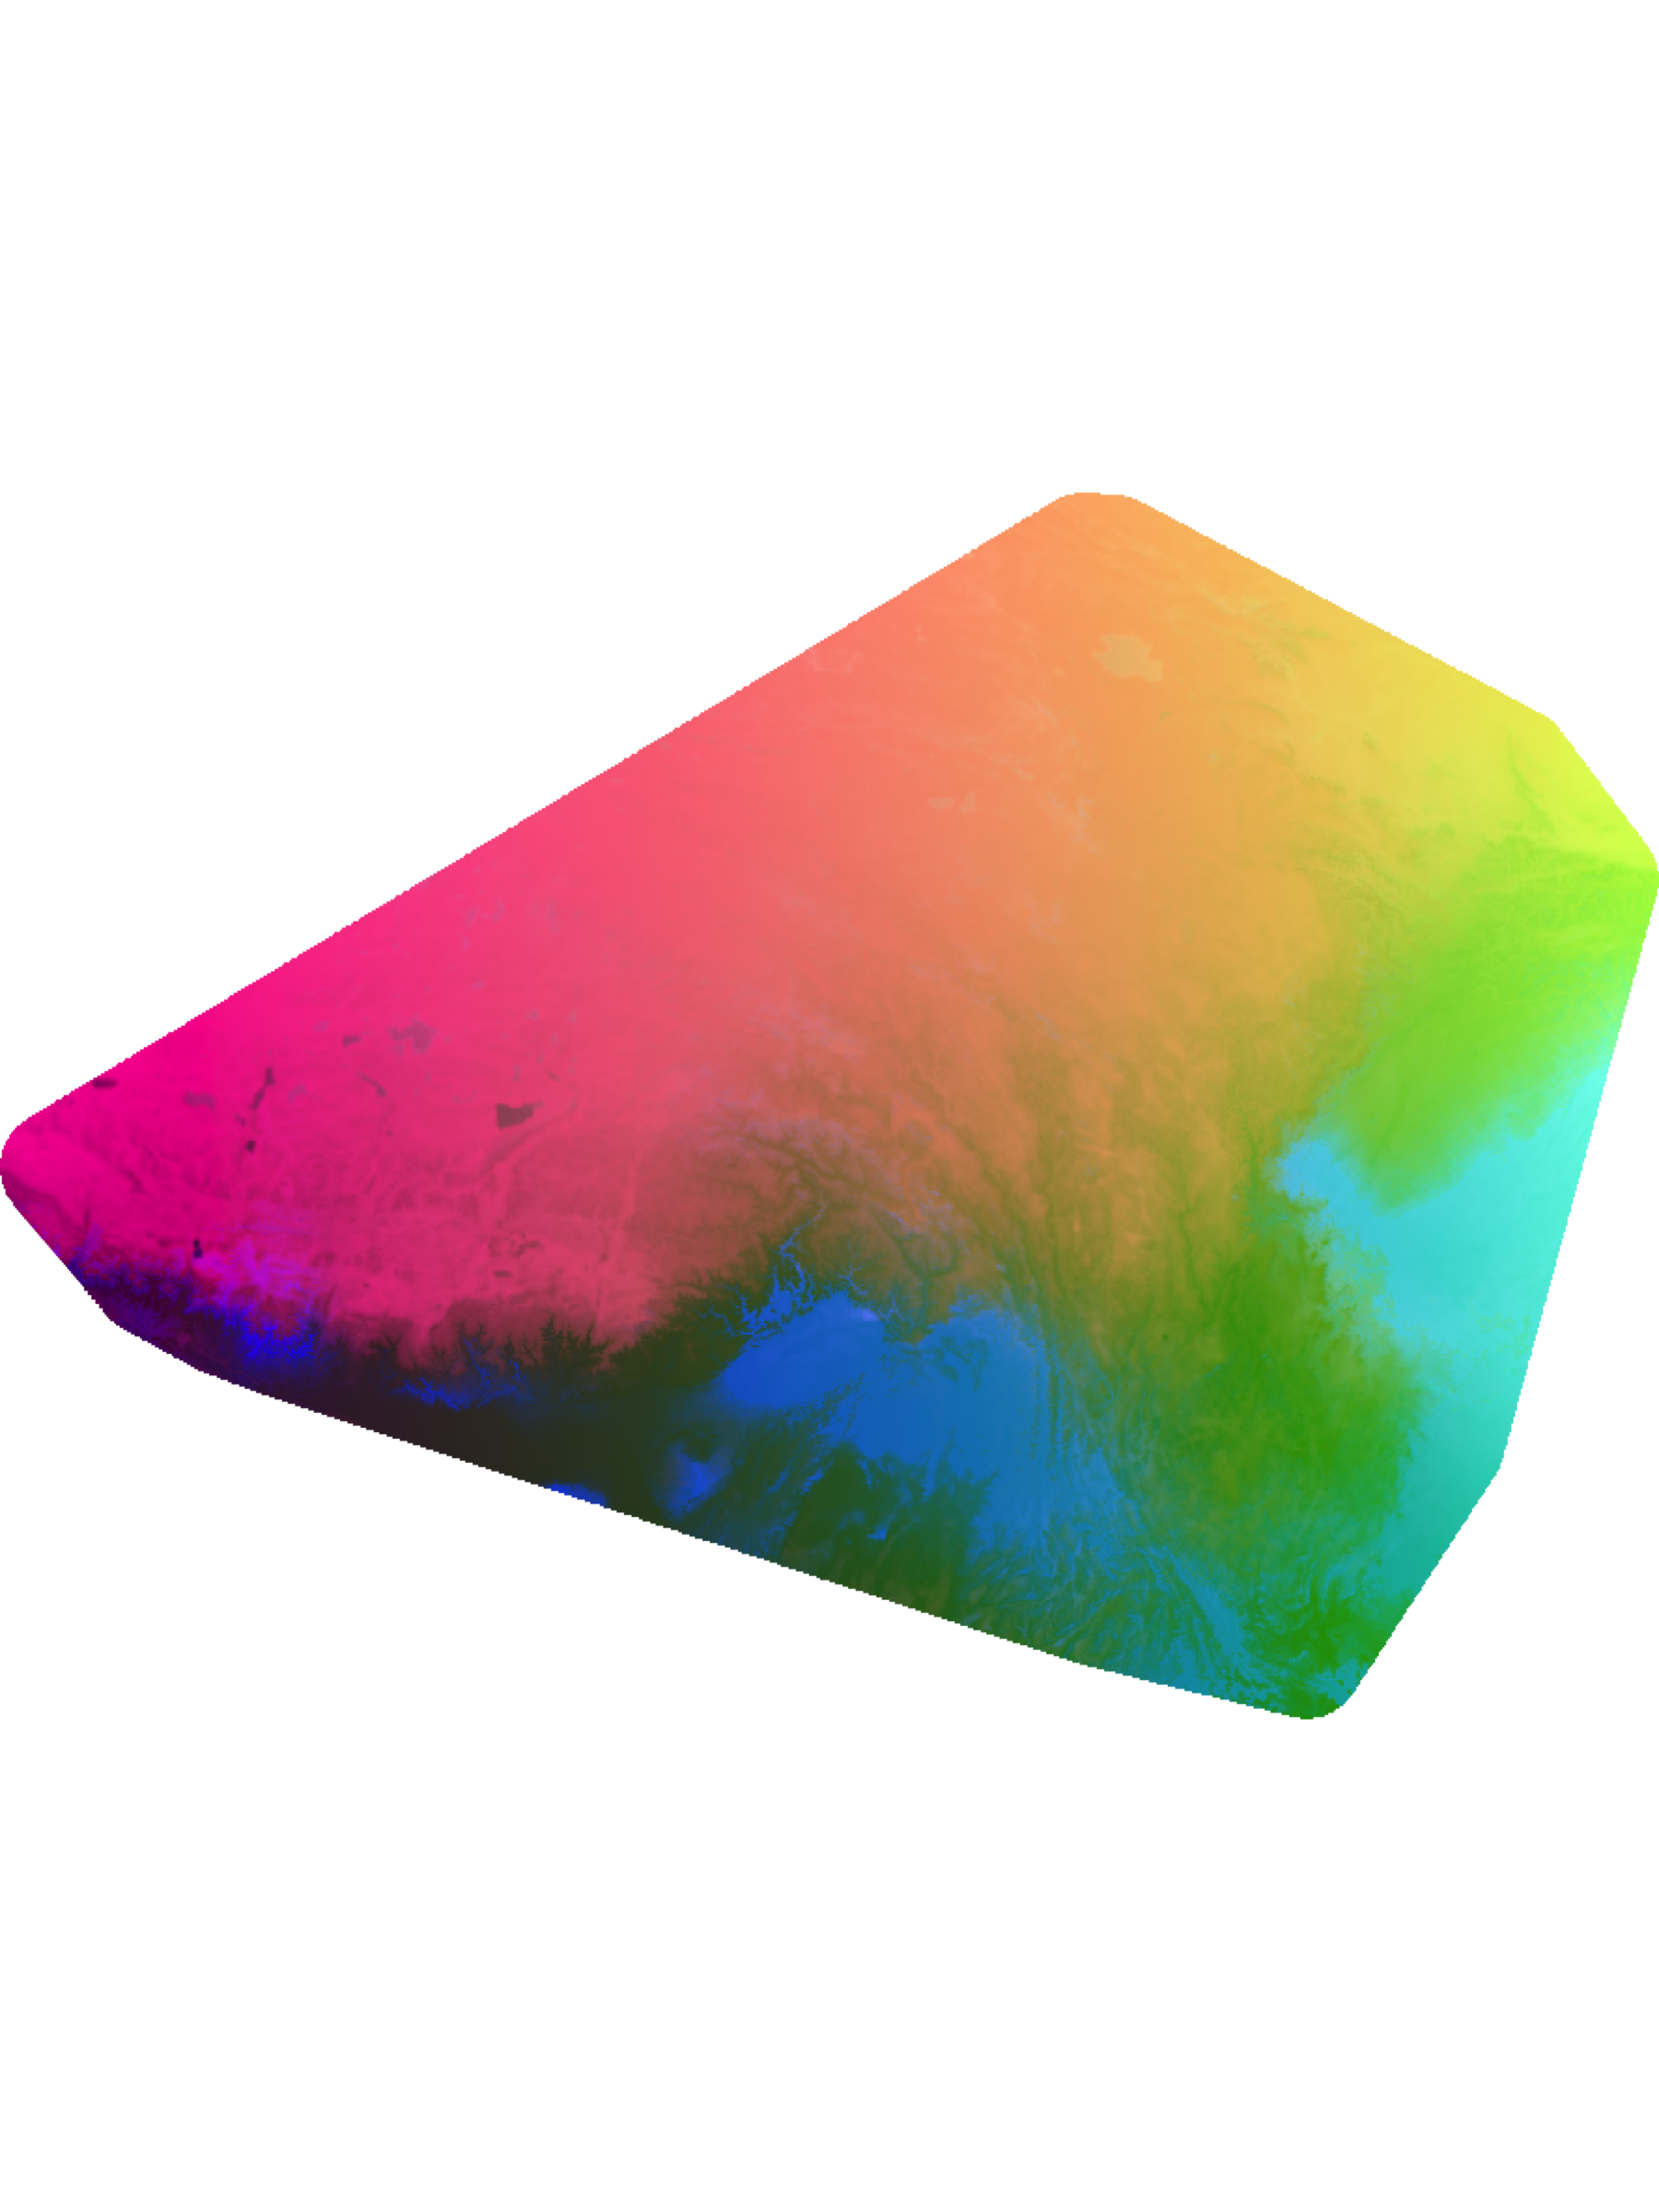

In [48]:
# Perform the principle components analysis on the gdm transformed rasters
pcaSamp <- terra::prcomp(transRasts, maxcell = 5e5)
 
# Predict the first three principle components for every cell in the rasters
# note the use of the 'index' argument
pcaRast <- terra::predict(transRasts, pcaSamp, index=1:3)

# Stretch the PCA rasters to make full use of the colour spectrum
pcaRast <- terra::stretch(pcaRast)

# Plot the three PCA rasters simultaneously, each representing a different colour 
#  (red, green, blue)
terra::plotRGB(pcaRast, r=1, g=2, b=3)

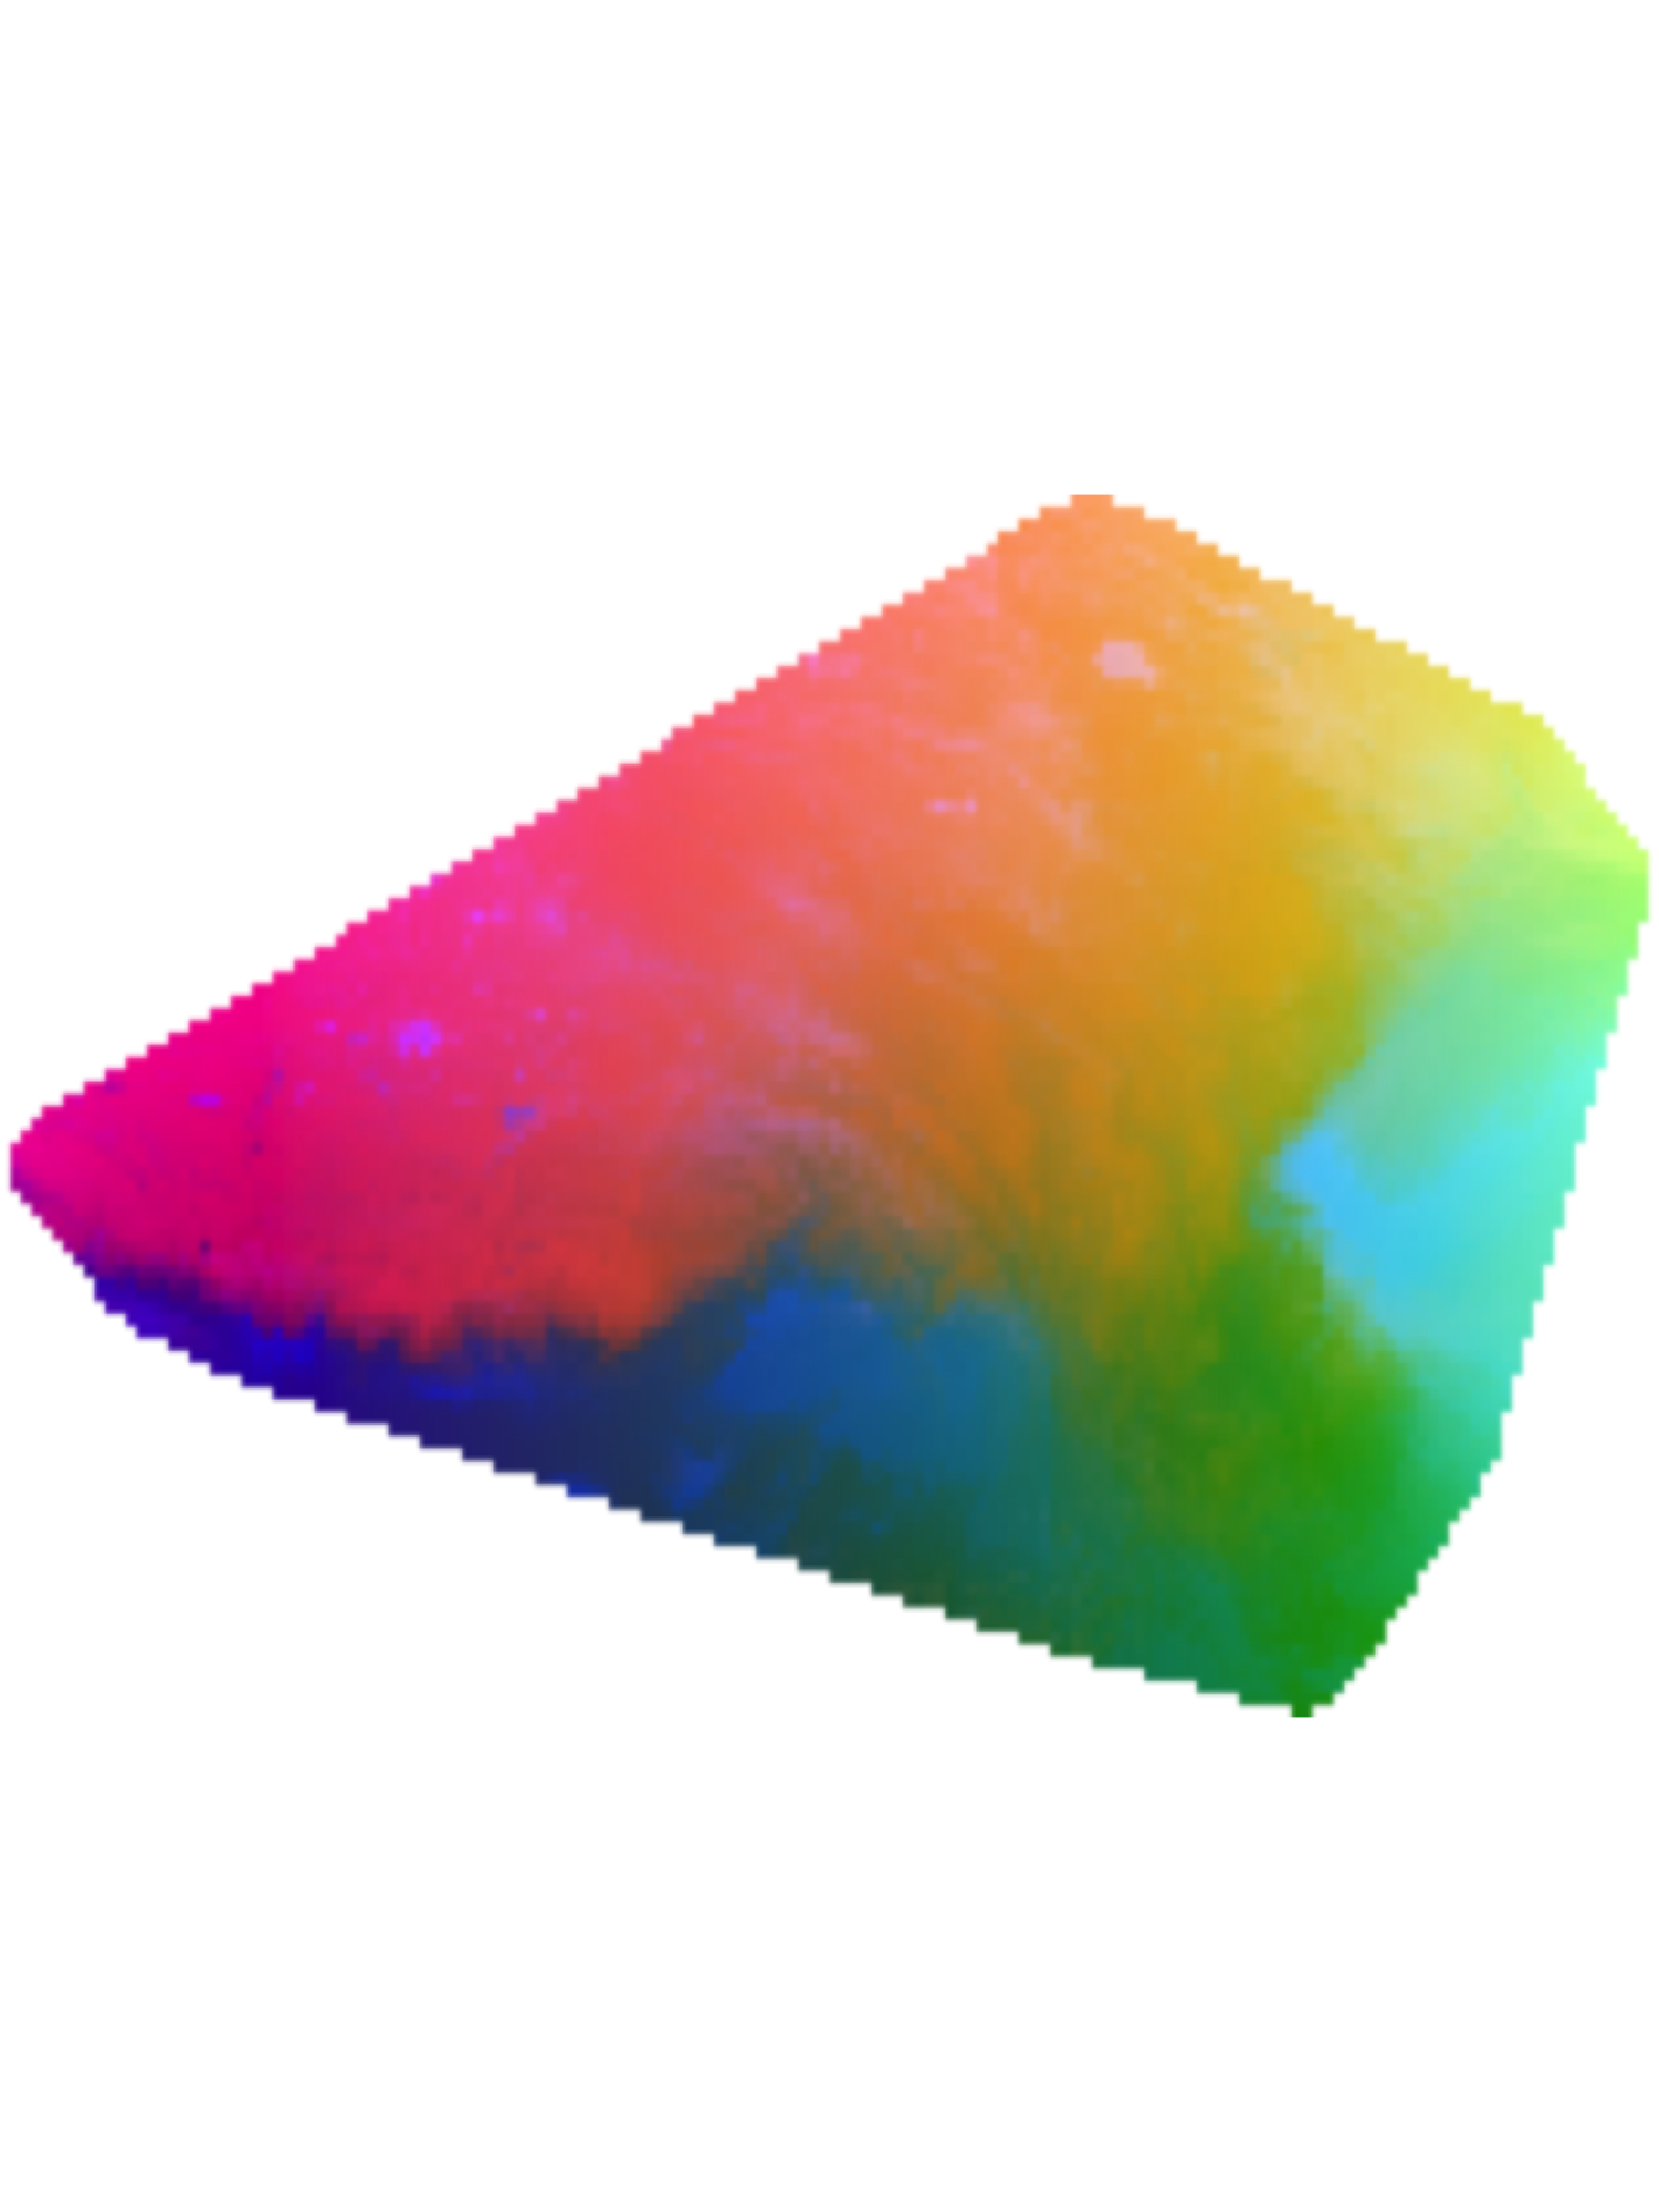

In [41]:
# Perform the principle components analysis on the gdm transformed rasters
pcaSamp <- terra::prcomp(transRasts, maxcell = 5e5)
 
# Predict the first three principle components for every cell in the rasters
# note the use of the 'index' argument
pcaRast <- terra::predict(transRasts, pcaSamp, index=1:3)

# Stretch the PCA rasters to make full use of the colour spectrum
pcaRast <- terra::stretch(pcaRast)

# Plot the three PCA rasters simultaneously, each representing a different colour 
#  (red, green, blue)
terra::plotRGB(pcaRast, r=1, g=2, b=3)

# IGNORE

In [21]:
point <- data.frame(lon = 85.42553, lat = 28.50715)
# Convert to SpatVector
pnt <- vect(point, geom = c("lon", "lat"), crs = "EPSG:4326") 
values <- extract(rasters, pnt)
print(values)

  ID wc2.1_10m_bio_1 wc2.1_10m_bio_10 wc2.1_10m_bio_11 wc2.1_10m_bio_12
1  1       -3.331677             3.48        -10.46783              343
  wc2.1_10m_bio_13 wc2.1_10m_bio_14 wc2.1_10m_bio_15 wc2.1_10m_bio_16
1               51                8         47.29009              130
  wc2.1_10m_bio_17 wc2.1_10m_bio_18 wc2.1_10m_bio_19 wc2.1_10m_bio_2
1               38               65              128        11.00848
  wc2.1_10m_bio_3 wc2.1_10m_bio_4 wc2.1_10m_bio_5 wc2.1_10m_bio_6
1        42.42189        575.4952           8.202         -17.748
  wc2.1_10m_bio_7 wc2.1_10m_bio_8 wc2.1_10m_bio_9
1           25.95       -9.771334      -0.3426251


In [20]:
summary(rasters)

Warning message:
“[summary] used a sample”


 wc2.1_10m_bio_1  wc2.1_10m_bio_10 wc2.1_10m_bio_11 wc2.1_10m_bio_12
 Min.   :-54.72   Min.   :-37.72   Min.   :-66.19   Min.   :   0.0  
 1st Qu.:-22.81   1st Qu.:-10.58   1st Qu.:-34.22   1st Qu.: 110.0  
 Median : -0.53   Median : 13.82   Median :-15.20   Median : 337.0  
 Mean   : -4.05   Mean   :  7.19   Mean   :-13.90   Mean   : 550.3  
 3rd Qu.: 19.02   3rd Qu.: 24.80   3rd Qu.: 12.13   3rd Qu.: 690.0  
 Max.   : 30.71   Max.   : 38.18   Max.   : 28.62   Max.   :7011.0  
 NA's   :65591    NA's   :65591    NA's   :65591    NA's   :65591   
 wc2.1_10m_bio_13 wc2.1_10m_bio_14 wc2.1_10m_bio_15 wc2.1_10m_bio_16
 Min.   :   0.0   Min.   :  0.00   Min.   :  0.00   Min.   :   0.0  
 1st Qu.:  28.0   1st Qu.:  0.00   1st Qu.: 41.41   1st Qu.:  56.0  
 Median :  60.0   Median :  5.00   Median : 64.80   Median : 152.0  
 Mean   :  93.5   Mean   : 15.39   Mean   : 74.63   Mean   : 241.8  
 3rd Qu.: 112.0   3rd Qu.: 18.00   3rd Qu.:100.13   3rd Qu.: 298.0  
 Max.   :1965.0   Max.   :471.00  